<a href="https://colab.research.google.com/github/Ishansingh438/Face-emotion-recognition/blob/main/Ishan_Singh_Face_emotion_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.1 Introduction
* The Indian education landscape has been undergoing rapid changes for the past 10 years owing to the advancement of web-based learning services, specifically, eLearning platforms.
* Global E-learning is estimated to witness an 8X over the next 5 years to reach USD 2B in 2021. India
is expected to grow with a CAGR of 44% crossing the 10M users mark in 2021. Although the market
is growing on a rapid scale, there are major challenges associated with digital learning when
compared with brick and mortar classrooms. One of many challenges is how to ensure quality
learning for students. Digital platforms might overpower physical classrooms in terms of content
quality but when it comes to understanding whether students are able to grasp the content in a live
class scenario is yet an open-end challenge.
* In a physical classroom during a lecturing teacher can see the faces and assess the emotion of the
class and tune their lecture accordingly, whether he is going fast or slow. He can identify students who
need special attention. Digital classrooms are conducted via video telephony software program (ex-
Zoom) where it’s not possible for medium scale class (25-50) to see all students and access the
mood. Because of this drawback, students are not focusing on content due to lack of surveillance.
While digital platforms have limitations in terms of physical surveillance but it comes with the power of
data and machines which can work for you. It provides data in the form of video, audio, and texts
which can be analysed using deep learning algorithms. Deep learning backed system not only solves
the surveillance issue, but it also removes the human bias from the system, and all information is no
longer in the teacher’s brain rather translated in numbers that can be analysed and tracked.

# 1.2 Problem Statement
We will solve the above-mentioned challenge by applying deep learning algorithms to live video data.
The solution to this problem is by recognizing facial emotions.
* 1.2.1 - **Face Emotion Recognition**
> This is a few shot learning live face emotion detection system. The model should be able to real-time
identify the emotions of students in a live class.



# 1.3 Scope of Project


> A. Model should be able to identify students’ emotions using minimum reference images.

> B. Model should work on the real-time webcam video feed.

> C. Model must be deployed on AWS/GCP/Azure platform as an end-to-end solution.

> D. Model must be accessible via a web application (Streamlit) for demo purposes.


# Dataset Information
The data comes from the past Kaggle competition “Challenges in Representation Learning: Facial Expression Recognition Challenge”. The faces have been automatically registered so that the face is more or less centered and occupies about the same amount of space in each image.

This dataset contains 35887 grayscale 48x48 pixel face images.

Each image corresponds to a facial expression in one of seven categories

Labels:

> 0 - Angry 😠

> 1 - Disgust 😧

> 2 - Fear 😨

> 3 - Happy 😃

> 4 - Sad 😞

> 5 - Surprise 😮

> 6 - Neutral 😐

* Dataset link - https://www.kaggle.com/msambare/fer2013

# Using DeepFace
> Deepface is a lightweight face recognition and facial attribute analysis (age, gender, emotion and race) framework for python.

> The process of facial recognition starts with the human face and identifying its necessary facial features and patterns. A human face comprises a very basic set of features, such as eyes, nose, and mouth. Facial recognition technology learns what a face is and how it looks. This is done by using deep neural network & machine learning algorithms on a set of images with human faces looking at different angles or positions.

In [120]:
# importing required libraries

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Dense, Dropout,Flatten, BatchNormalization,Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import load_model
from tensorflow.keras import Model
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np 
import cv2
import os

# Removing Warnings

import warnings                                                                                
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [42]:
# Importing Deep Learning Libraries

import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

In [2]:
# installing deepface library

!pip install deepface

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 65 kB 1.9 MB/s 
     |████████████████████████████████| 2.3 MB 9.8 MB/s 
     |████████████████████████████████| 87 kB 9.0 MB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115942 sha256=e47e9a8f6b331053325d6f586e9a490dd85e7d6b24eb106a900d1e7f6fd40cc6
  Stored in directory: /root/.cache/pip/wheels/8a/67/fb/2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
Successfully built fire


In [3]:
from deepface import DeepFace

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [4]:
# Importing drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Image Prediction using DeepFace

In [5]:
pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
from PIL import Image

In [7]:
path = "/content/drive/MyDrive/Colab Notebooks/Capstone project 5/Happy Face.jpg"

In [8]:
img = Image.open(path)

# Converting the image into the numpy array
img_array = np.array(img)

In [9]:
img_array = cv.imread(path)

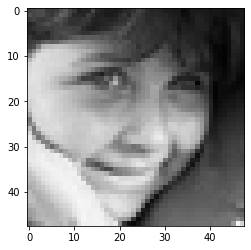

In [10]:
plt.imshow(img_array)
plt.show()

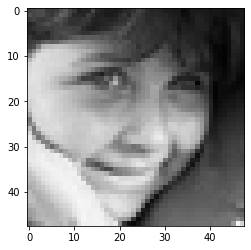

In [11]:
# convert image from BGR to RGB to work on RGB images

plt.imshow(cv.cvtColor(img_array, cv.COLOR_BGR2RGB))
plt.show()

In [13]:
# image prediction

img_prediction = DeepFace.analyze(img_array , enforce_detection =False)

Action: race: 100%|██████████| 4/4 [00:12<00:00,  3.03s/it]


In [14]:
img_prediction

{'emotion': {'angry': 2.440293245253855e-08,
  'disgust': 8.115805950052084e-14,
  'fear': 5.640531375306068e-08,
  'happy': 95.5910861492157,
  'sad': 8.400814266451562e-07,
  'surprise': 0.00013892430388295907,
  'neutral': 4.408776760101318},
 'dominant_emotion': 'happy',
 'region': {'x': 0, 'y': 0, 'w': 48, 'h': 48},
 'age': 29,
 'gender': 'Woman',
 'race': {'asian': 6.455063819885254,
  'indian': 9.14546251296997,
  'black': 1.5373782254755497,
  'white': 32.74138569831848,
  'middle eastern': 21.73408716917038,
  'latino hispanic': 28.386622667312622},
 'dominant_race': 'white'}

# Transfer Learning - Prediction using ResNet50
> Transfer learning (TL) is a research problem in machine learning (ML) that focuses on storing knowledge gained while solving one problem and applying it to a different but related problem. For example, knowledge gained while learning to recognize cars could apply when trying to recognize trucks. Reusing or transferring information from previously learned tasks to learning of new tasks has the potential to significantly improve the sample efficiency of a Data Scientist.

> ResNet-50 is a convolutional neural network that is 50 layers deep. You can load a pretrained version of the network trained on more than a million images from the ImageNet database. The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals.

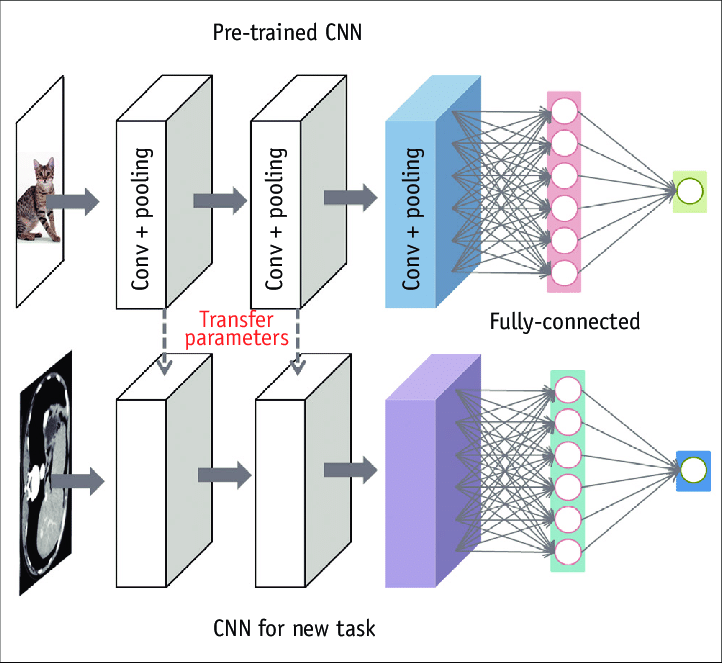

In [16]:
# print version of tensorflow

print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.8.2


In [23]:
# Importing zip file from google drive and extracting here.

from zipfile import ZipFile
filename = "/content/drive/MyDrive/Colab Notebooks/Capstone project 5/archive.zip"

# Extraction
with ZipFile(filename , 'r') as zip:
  zip.extractall()
  print('Zip file extracted successfully')

Zip file extracted successfully


In [24]:
# Test and Train data

test_data = '/content/test/'
train_data = '/content/train/'

In [25]:
# list the directory of test path

os.listdir(test_data)

['neutral', 'disgust', 'angry', 'surprise', 'sad', 'fear', 'happy']

In [26]:
os.listdir(train_data)

['neutral', 'disgust', 'angry', 'surprise', 'sad', 'fear', 'happy']

In [27]:
# Define a function to plot some images from different classes

def plot_images(img_dir, top=10):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:5]

    plt.figure(figsize=(10, 10))
  
    for idx, img_path in enumerate(img_files):
        plt.subplot(5, 5, idx+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray')

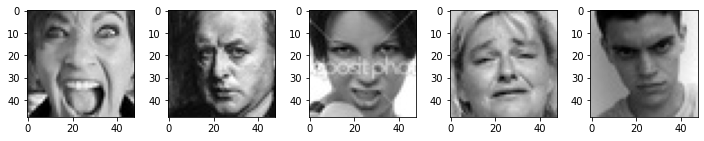

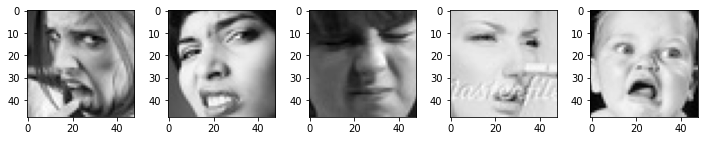

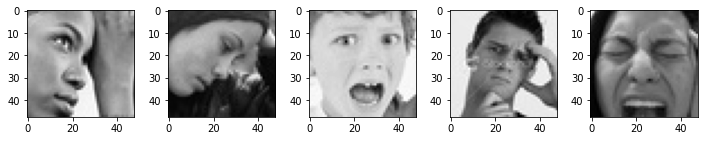

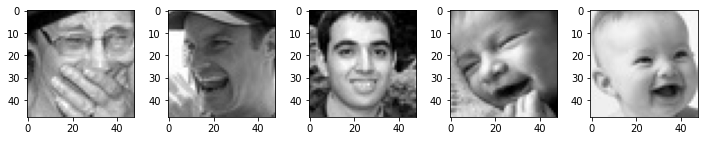

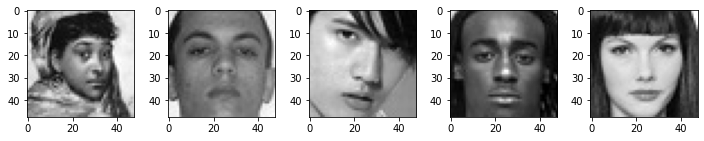

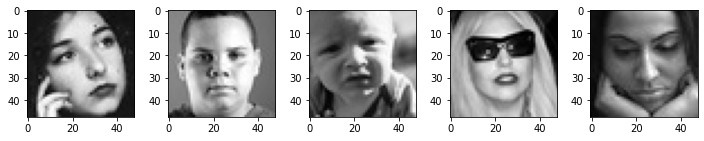

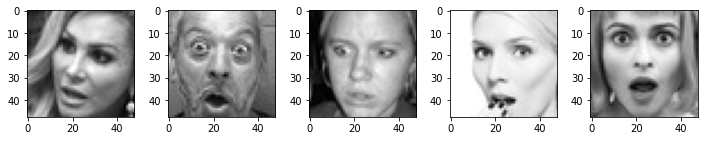

In [28]:
# angry class
plot_images(train_data+'/angry')

# disgust class
plot_images(train_data+'/disgust')

# Fear class
plot_images(train_data+'/fear')

# Happy class
plot_images(train_data+'/happy')

#Neutral class
plot_images(train_data+'/neutral')

# Sad class
plot_images(train_data+'/sad')

# Surprise class
plot_images(train_data+'/surprise')

In [29]:
for expression in os.listdir(train_data):
  print(str(len(os.listdir(train_data + expression))) + " " + expression + " images")

4965 neutral images
436 disgust images
3995 angry images
3171 surprise images
4830 sad images
4097 fear images
7215 happy images


## ResNet Data Generators

In [30]:
# Resnet is trained on rgb photos, we have grascaled images so converting colour mode to rgb is very important

datagen_train = ImageDataGenerator(horizontal_flip=True,brightness_range=[0.8,1.2],rescale=1./255)
datagen_validation = ImageDataGenerator(horizontal_flip=True,brightness_range=[0.8,1.2],rescale=1./255)

In [31]:
# Size of image and batch

img_size = 48         
batch_size = 32       
 

train_generator = datagen_train.flow_from_directory(train_data,
                                                  target_size=(img_size,img_size),
                                                  batch_size=batch_size,
                                                  shuffle=True,
                                                  color_mode='rgb',
                                                  class_mode='categorical')

validation_generator = datagen_train.flow_from_directory(test_data,
                                                  target_size=(img_size,img_size),
                                                  batch_size=batch_size,
                                                  shuffle=False,
                                                  color_mode='rgb',
                                                  class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## Building ResNet model with CNN

In [32]:
# Using pretrained model, RESNET50 architecture

from tensorflow.keras.applications.resnet50 import ResNet50

In [33]:
# Creating a base model using resnet and loading the pretrained weights 

base_model = ResNet50(input_shape=(48,48,3),include_top = False, weights = 'imagenet')
base_model.summary()

94781440/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 54, 54, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 24, 24, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 24, 24, 64)   256         ['conv1_conv[0][0]']             
                          

In [34]:
# making all the layers except last 4 layers non trainable 

for layer in base_model.layers[:-4]:
    layer.trainable = False

In [35]:
# Build model on the top of base model

epochs=50
batch_size = 32

model = Sequential()

model.add(base_model)
model.add(Dropout(0.2))
model.add(Flatten())
model.add(BatchNormalization())

# Fully connected 1st layer
model.add(Dense(512,kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(256,kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Dropout(0.25))

# Output layer
model.add(Dense(7, activation='softmax'))


# Final model summary
model.summary()


# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])


steps_per_epoch = train_generator.n//train_generator.batch_size

validation_steps = validation_generator.n//validation_generator.batch_size


# This decreases the learning rate if the model loss does not decrease 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=10, min_lr=0.00001, mode='auto')

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 dropout_8 (Dropout)         (None, 2, 2, 2048)        0         
                                                                 
 flatten_7 (Flatten)         (None, 8192)              0         
                                                                 
 batch_normalization (BatchN  (None, 8192)             32768     
 ormalization)                                                   
                                                                 
 dense_3 (Dense)             (None, 512)               4194816   
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                      

In [36]:
# To save model weights to my drive loaction

weight_checkpoint_path = '/content/drive/MyDrive/Colab Notebooks/Capstone project 5/Model Checkpoint'

checkpoint = ModelCheckpoint(weight_checkpoint_path, monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)
early_stopping=EarlyStopping(monitor='val_loss',
                            min_delta=0,
                            patience=10,
                            verbose=1,
                            restore_best_weights=True)
callbacks = [checkpoint, reduce_lr,early_stopping]


# Fitting the model 
history = model.fit(
    x=train_generator,
    batch_size=batch_size,
    epochs=epochs,
    validation_data = validation_generator,
    callbacks=callbacks,
    verbose=1)

Epoch 1/50
897/898 [============================>.] - ETA: 0s - loss: 1.8509 - accuracy: 0.2703
Epoch 1: saving model to /content/drive/MyDrive/Colab Notebooks/Capstone project 5/Model Checkpoint
898/898 [==============================] - 38s 34ms/step - loss: 1.8506 - accuracy: 0.2704 - val_loss: 1.7775 - val_accuracy: 0.2788 - lr: 0.0010
Epoch 2/50
898/898 [==============================] - ETA: 0s - loss: 1.7246 - accuracy: 0.3153
Epoch 2: saving model to /content/drive/MyDrive/Colab Notebooks/Capstone project 5/Model Checkpoint
898/898 [==============================] - 29s 33ms/step - loss: 1.7246 - accuracy: 0.3153 - val_loss: 1.9774 - val_accuracy: 0.2150 - lr: 0.0010
Epoch 3/50
896/898 [============================>.] - ETA: 0s - loss: 1.6894 - accuracy: 0.3278
Epoch 3: saving model to /content/drive/MyDrive/Colab Notebooks/Capstone project 5/Model Checkpoint
898/898 [==============================] - 28s 31ms/step - loss: 1.6892 - accuracy: 0.3279 - val_loss: 1.7932 - val_accu

In [40]:
# save history of the model in dataframe df_modelhis
df_modelhis=pd.DataFrame(model.history.history)

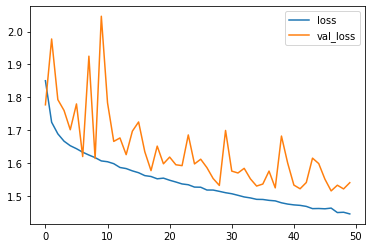

In [41]:
#Plotting Loss
df_modelhis[['loss','val_loss']].plot()


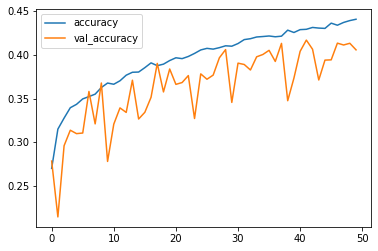

In [38]:
#Plotting accuracy
df_modelhis[['accuracy','val_accuracy']].plot()

We have trained the model with ResNet50 and got the training accuracy of 44% and validation accuracy of 41.133% which is not acceptaable.

# What is CNN ?

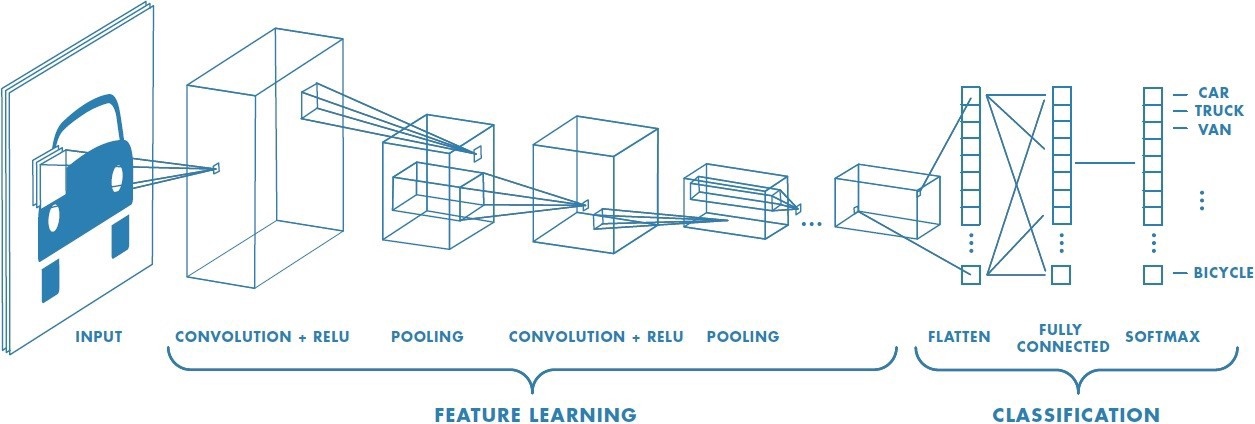

# Custom CNN Model
> A convolution network generally consists of alternate convolution and max-pooling operations. The output obtained after applying convolution operation is shrunk using max-pooling operation which is then used as an input for the next layer. 

> A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other. The pre-processing required in a ConvNet is much lower as compared to other classification algorithms. While in primitive methods filters are hand-engineered, with enough training, ConvNets have the ability to learn these filters/characteristics. The architecture of a ConvNet is analogous to that of the connectivity pattern of Neurons in the Human Brain and was inspired by the organization of the Visual Cortex. Individual neurons respond to stimuli only in a restricted region of the visual field known as the Receptive Field. A collection of such fields overlap to cover the entire visual area.


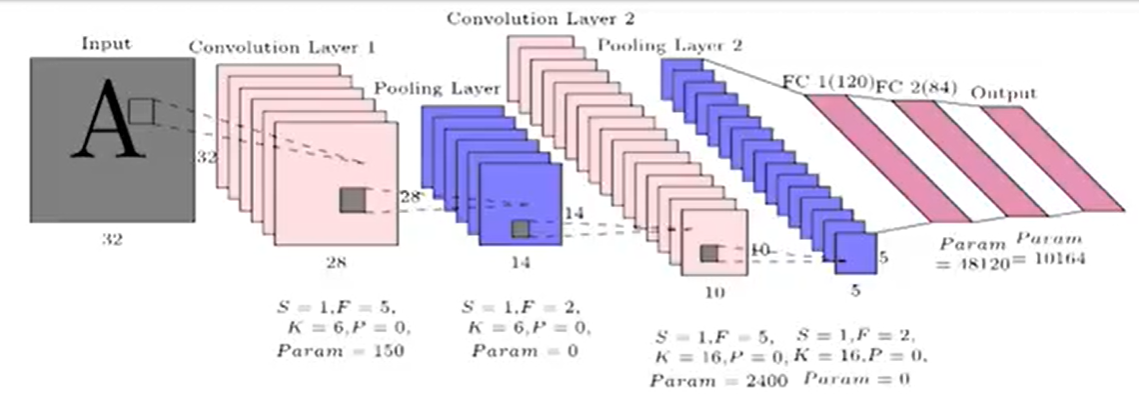

In [44]:
# Creating Image generators, for all train, validation, and test set

training_gen=ImageDataGenerator(rescale=1./255)
testing_gen=ImageDataGenerator(rescale=1./255)

In [45]:
# Creating  Training Dataset
train_gen=training_gen.flow_from_directory(train_data,                
                                           target_size=(48,48),
                                           batch_size=32,
                                           color_mode='grayscale',
                                           class_mode='categorical')

# Creating Test Set
test_gen=testing_gen.flow_from_directory(test_data,                                       
                                           target_size=(48,48),  
                                           batch_size=32,
                                           color_mode='grayscale',
                                           class_mode='categorical',
                                           shuffle= False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [126]:
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

epochs = 48
no_of_classes = 7
learning_rate = 0.001

model = Sequential()

# 1st CNN layer

model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

# 2nd CNN layer

model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

# 3rd CNN layer

model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

# 4th CNN layer

model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

# Fully connected 1st layer

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(no_of_classes, activation='softmax'))

In [127]:
opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_61 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_15 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 activation_20 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_23 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_62 (Conv2D)          (None, 24, 24, 128)     

In [50]:
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=5,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]



model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

 # Fitting the model

results = model.fit_generator(generator=train_gen,
                                steps_per_epoch=train_gen.n//train_gen.batch_size,
                                epochs=40,
                                validation_data = test_gen,
                                validation_steps = test_gen.n//test_gen.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/40
897/897 [==============================] - 21s 22ms/step - loss: 1.5312 - accuracy: 0.4112 - val_loss: 1.4535 - val_accuracy: 0.4499 - lr: 0.0010
Epoch 2/40
897/897 [==============================] - 18s 20ms/step - loss: 1.2881 - accuracy: 0.5080 - val_loss: 1.2736 - val_accuracy: 0.5152 - lr: 0.0010
Epoch 3/40
897/897 [==============================] - 18s 20ms/step - loss: 1.2087 - accuracy: 0.5424 - val_loss: 1.2548 - val_accuracy: 0.5294 - lr: 0.0010
Epoch 4/40
897/897 [==============================] - 18s 20ms/step - loss: 1.1362 - accuracy: 0.5697 - val_loss: 1.1738 - val_accuracy: 0.5534 - lr: 0.0010
Epoch 5/40
897/897 [==============================] - 18s 20ms/step - loss: 1.0886 - accuracy: 0.5886 - val_loss: 1.2072 - val_accuracy: 0.5555 - lr: 0.0010
Epoch 6/40
897/897 [==============================] - 19s 21ms/step - loss: 1.0343 - accuracy: 0.6094 - val_loss: 1.0796 - val_accuracy: 0.5970 - lr: 0.0010
Epoch 7/40
897/897 [==============================] - 19s 

In [128]:
# Predicting For Test Set
predictions=model.predict(test_gen)

# Printing Confution Matrix
cm=confusion_matrix(y_pred=np.argmax(predictions, axis=-1), y_true=test_gen.classes)                         
cm

array([[   1,  221,  736,    0,    0,    0,    0],
       [   0,   22,   89,    0,    0,    0,    0],
       [   0,  194,  829,    1,    0,    0,    0],
       [   0,  376, 1396,    2,    0,    0,    0],
       [   0,  276,  957,    0,    0,    0,    0],
       [   0,  325,  920,    2,    0,    0,    0],
       [   0,  128,  703,    0,    0,    0,    0]])

In [52]:
# Accuracy Score of Our Model
acc=accuracy_score(y_pred=np.argmax(predictions, axis=-1),y_true=test_gen.classes)
acc

0.6415436054611312

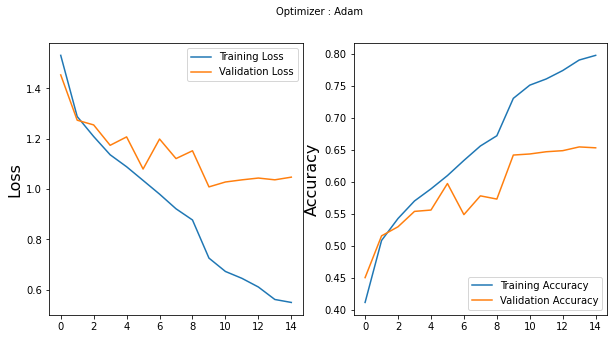

In [58]:
# Plotting Loss

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(results.history['loss'], label='Training Loss')
plt.plot(results.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

# Plotting Accuracy

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(results.history['accuracy'], label='Training Accuracy')
plt.plot(results.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [129]:
from sklearn.metrics import confusion_matrix
import itertools

<Figure size 432x288 with 0 Axes>

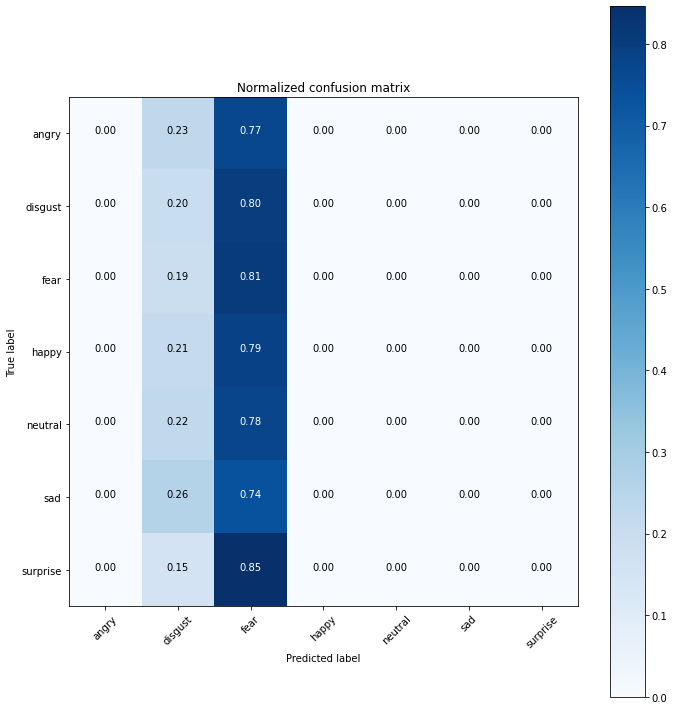

In [130]:
# Plotting confusion matrix of predictions

# Computing predictions

predictions = model.predict_generator(generator=test_gen)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = test_gen.classes
class_names = test_gen.class_indices.keys()

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
# Live Class Monitoring System(Face Emotion Recognition)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# Compute confusion matrix

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

In [140]:
model.save('/content/drive/MyDrive/Colab Notebooks/Capstone project 5/Model output/assets')

In [141]:
from keras.models import model_from_json
model_json = model.to_json()
with open('/content/drive/MyDrive/Colab Notebooks/Capstone project 5/Model output/custom_model_result.json/saved_model.pb', "w") as json_file:
    json_file.write(model_json)

• Our best model managed to obtain a accuracy of approximately 80% and val_accuracy of 65% on the dataset by running 40 epochs.which is quite good.
At each epoch, Keras checks if our model performed better than the models of the previous epochs.

• I thought it was a good score should improve the score.

• Thus I decided that I will deploy the model.

# Real Time face Detection

In google colab it isn't possible (for now atleast) to load and use opencv video processing commands. This is due to the fact that cv2.VideoCapture() request local machine to give access of webcamera but since google colab which runs on cloud server this command cannot be used. To fill the gap, we used Javascipt to get access of webcam.

In [142]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time


# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [143]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))


# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [144]:
colour_cycle = ((255, 0, 0), (0, 255, 0), (0, 0, 255), (230, 230, 250))

#Loading the model

In [204]:
from keras.models import model_from_json
import numpy as np
import cv2

def load_model(path):

	json_file = open(path + 'custom_model_result.json', 'r')
	loaded_model_json = json_file.read()
	json_file.close()
	
	model = model_from_json(loaded_model_json)
	model.load_weights(path + "custom_model_result.h5")
	print("Loaded model from disk")
	return model

def predict_emotion(gray, x, y, w, h):
	face = np.expand_dims(np.expand_dims(np.resize(gray[y:y+w, x:x+h]/255.0, (48, 48)),-1), 0)
	prediction = model.predict([face])

	return(int(np.argmax(prediction)), round(max(prediction[0])*100, 2))
 


In [208]:
model = load_model("/content/drive/MyDrive/Colab Notebooks/Capstone project 5/Model output/custom_model_result.json/saved_model.pb")

fcc_path = "Tools/haarcascade_frontalface_alt.xml"
faceCascade = cv2.CascadeClassifier(fcc_path)
emotion_dict = {0: "Angry", 1: "Disgust", 2: "Fear", 3: "Happy", 4: "Sad", 5: "Surprise", 6: "Neutral"}
colour_cycle = ((255, 0, 0), (0, 255, 0), (0, 0, 255), (230, 230, 250))
#  webcam = cv2.VideoCapture(0)

FileNotFoundError: ignored

## Video Streaming

In [184]:
from google.colab.patches import cv2_imshow
from IPython.display import clear_output

# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
counter = 1
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5,minSize=(30, 30))
    # get face bounding box for overlay
    for (count,(x, y, w, h)) in enumerate(faces):
      colour = colour_cycle[int(count%len(colour_cycle))]
      bbox_array = cv2.rectangle(bbox_array, (x, y), (x+w, y+h), colour, 2)
      bbox_array = cv2.line(bbox_array, (x+5, y+h+5),(x+100, y+h+5), colour, 20)
      bbox_array = cv2.putText(bbox_array, "Face #"+str(count+1), (x+5, y+h+11), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), lineType=cv2.LINE_AA)
      bbox_array = cv2.line(bbox_array, (x+8, y),(x+150, y), colour, 20)
      emotion_id, confidence = predict_emotion(gray, x, y, w, h)
      emotion = emotion_dict[emotion_id]
      bbox_array = cv2.putText(bbox_array, emotion + ": " + str(confidence) + "%" , (x+20, y+5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), lineType=cv2.LINE_AA)
      bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
      # convert overlay of bbox into bytes
      bbox_bytes = bbox_to_bytes(bbox_array)
      # update bbox so next frame gets new overlay
      bbox = bbox_bytes      
    if cv2.waitKey(1) & 0xFF == ord('q'):
      break;
# out.release()
# webcam.release()
cv2.destroyAllWindows()

<IPython.core.display.Javascript object>

# Conclusion
Trained the neural network with the highest validation accuracy of 65%.

Pre Trained Model didn't gave appropriate result.

The application is able to detect face location and predict the right expression while checking it on a local webcam.

The front-end of the model was made using streamlit for webapp and running well on local webapp link.

Finally, we successfully deployed the Streamlit WebApp on Heroku and Streamlit share that runs on a web server.

Our Model can succesfully detect face and predict emotion on live video feed as well as on an image.